In [117]:
import random
import matplotlib.pyplot as plt

n_list = [i for i in range(10, 151, 10)]
s_list = [i/100 for i in range(0, 15, 2)]

trials = 10000

In [118]:
def neutral(trials, N):
    result = []
    current_res = None

    for i in range(trials):
        A, B = 1, N-1 #choosing 1/N 
        #will A take over?
        while A > 0 and B > 0: #while there are still people in both populations
            #choose a random individual from the group to either give birth or DIE
            indiv_born = random.choice(['A', 'B'])
            indiv_die = random.choice(['A', 'B'])

            if indiv_born == 'B': B += 1
            else: A += 1

            if indiv_die == 'B': B -= 1
            else: A -= 1
        
        #if A takes over:
        current_res = 'A' if A>0 else 'B' 
        result.append(current_res)

    return result
    

In [119]:
def advantage(N, s, trials):
    wA, wB = (1+s)/(1+s+1), 1/(2+s)
    result = []
    current_res = None

    for i in range(trials):
        A, B = 1, N-1 #choosing 1/N 
        #will A take over?
        while A > 0 and B > 0: #while there are still people in both populations
            #choose a random individual from the group to either give birth or DIE

            #A has some weight attached to it
            choices_with_weights = random.choices(['A', 'B'], weights = (wA, wB))
            indiv_born = choices_with_weights.pop()
            #death has same probability from both groups
            indiv_die = random.choice(['A', 'B'])

            if indiv_born == 'B': B += 1
            else: A += 1

            if indiv_die == 'B': B -= 1
            else: A -= 1
        
        #if A takes over:
        current_res = 'A' if A>0 else 'B'
        result.append(current_res)
    return result

In [120]:
#for the neutral one
observed = [0 for n in range(len(n_list))]
expected = [1/N for N in n_list]

i = 0
for val in n_list:
    output = neutral(trials, val)
    a_count = 0
    #count the A throughout the output
    for v in output:
        if v == 'A': a_count +=1
    observed[i] = a_count/len(output)
    i += 1


In [121]:
#for the one where A has an advantage
observed_adv = [0 for i in range(len(s_list))]
#expected is the same as what has been defined before
N = 100
for val in s_list:
    output = advantage(N, val, trials)
    a_count = 0
    #count the A throughout the output
    for v in output:
        if v == 'A': a_count +=1
    observed_adv.append(a_count/len(output))

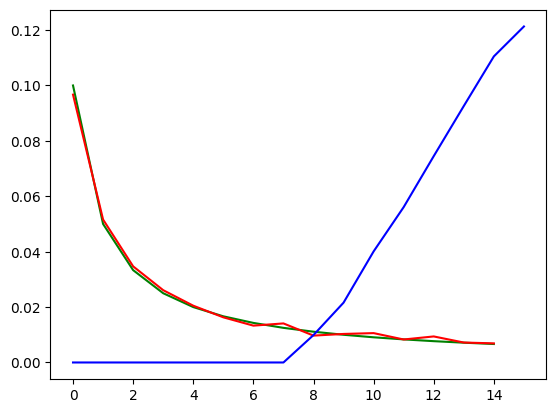

In [122]:
plt.plot(expected, color = 'g', label = "Expected")
plt.plot(observed, color = 'r', label = "Observed")
plt.plot(observed_adv, color = 'b', label = "Advantage")